## Warm up homework:

#### Plot how the mean square error changes with the polynomial degree ranging between 1 and 30. Do this for the cosine and some other function of your choosing. See what happens if you increase the measurment noise. 

author: **Maria Izabela Lewandowska**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
# Two different True functions

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def true_fun3(X, a =1):
    return (np.sin(a * X)/(X+0.0001))


In [3]:
# PLOT PARAMETERS FOR true_func():

xmin = 0
xmax = 1
ymin = -5
ymax = 5

font_size = 25
color = "purple"
x_label = "x"
y_label = "y"


degrees = np.arange(1,31)
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples)) * (xmax - xmin) + xmin
y = true_fun(X) + np.random.randn(n_samples) * 0.2

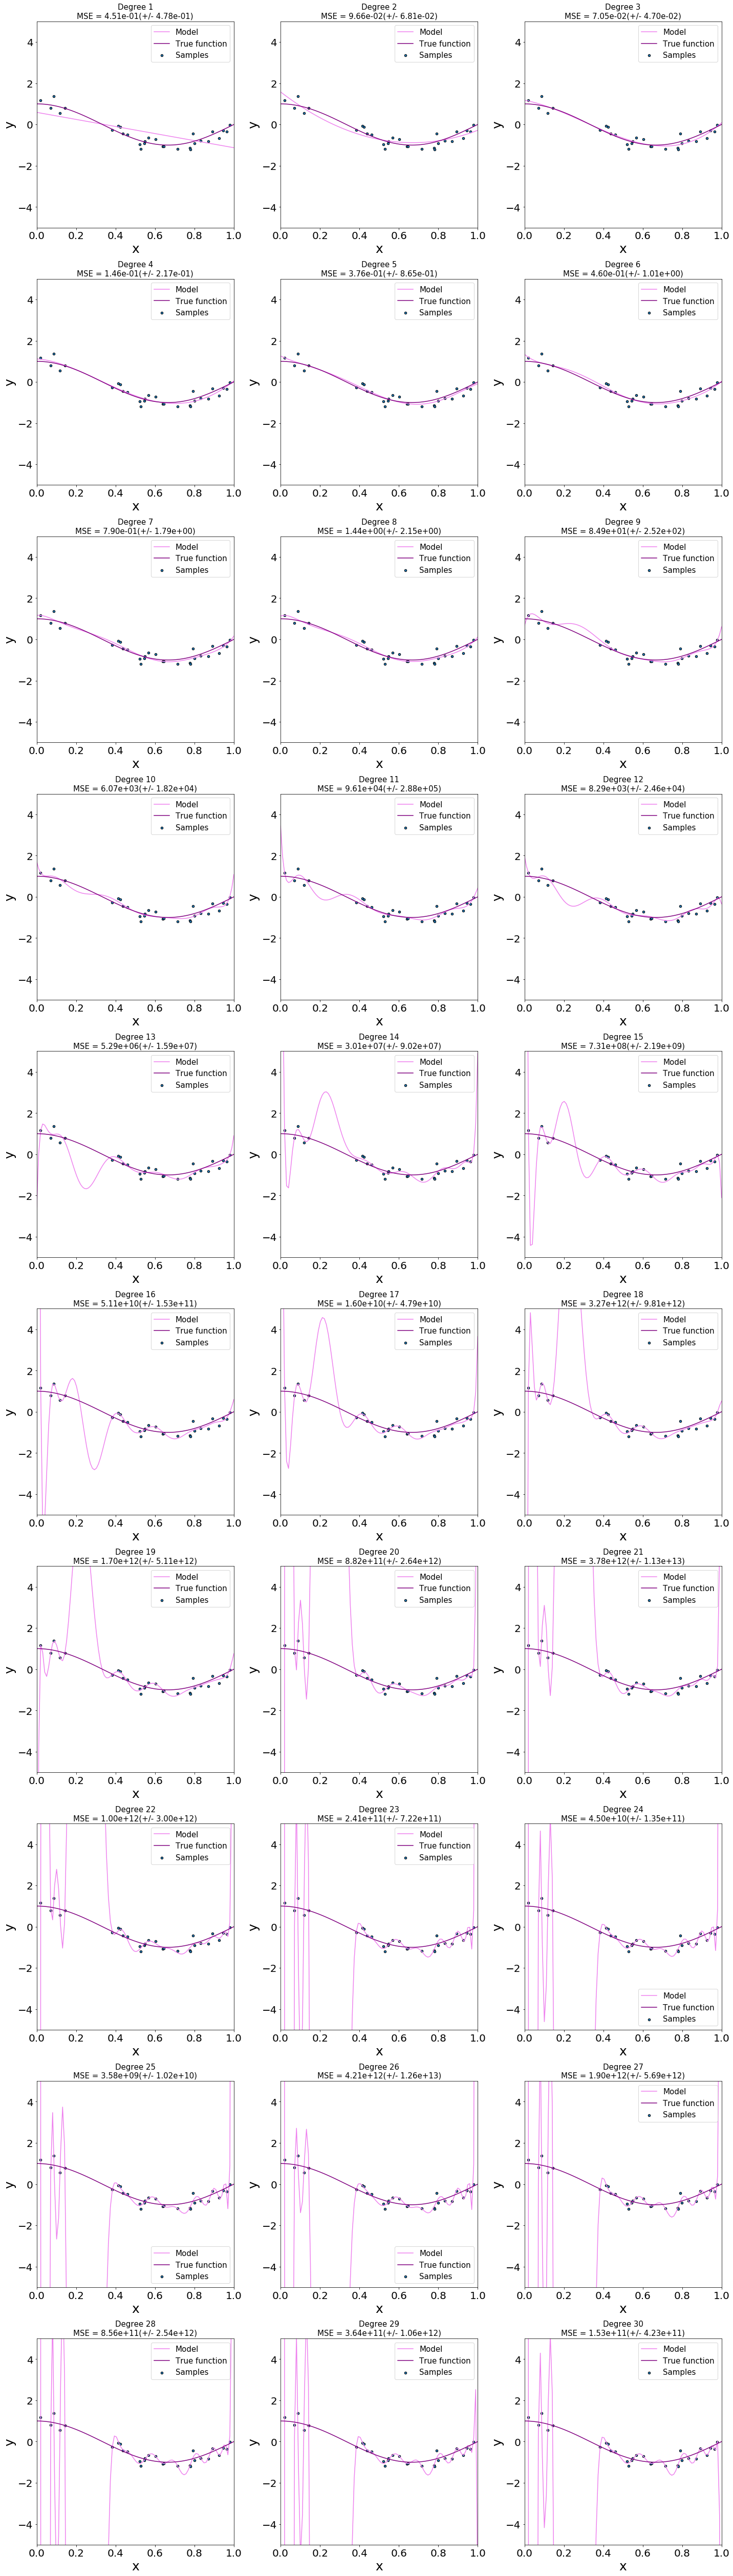

In [4]:
fig, axs = plt.subplots(nrows = 10, ncols = 3,  figsize = (20,70))
i = 0
X_test = np.linspace(0, 1, 100)
statistics = []

for row in axs:
    for ax in row:
        
        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        linear_regression = LinearRegression()
        
        pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)      
        
        ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color = 'violet', label="Model") 
        ax.plot(X_test, true_fun(X_test), color='purple', label="True function")
        ax.scatter(X, y, edgecolor= 'black', s=20, label="Samples")
        
        ax.set_ylabel(y_label)
        ax.yaxis.label.set_size( font_size )
        ax.set_ylim(ymin, ymax)       
        ax.set_xlabel(x_label)
        ax.xaxis.label.set_size( font_size )
        ax.set_xlim(xmin, xmax)       
        ax.tick_params(labelcolor = "black", labelsize = 20)      
        ax.legend(loc="best", fontsize = 15)
        
        statistics.append( np.array([i+1, -scores.mean(), scores.std()]) )
        ax.set_title("Degree {:}\nMSE = {:.2e}(+/- {:.2e})".format(i+1,-scores.mean(),scores.std()),
                     fontsize = 15   )     
        i = i+1
        
fig.tight_layout()      


In [5]:
# PLOT PARAMETERS FOR true_func():

xmin = 0
xmax = 1
ymin = -5
ymax = 5

font_size = 25
color = "purple"
x_label = "x"
y_label = "y"


degrees = np.arange(1,31)
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples)) * (xmax - xmin) + xmin
y = true_fun(X) + np.random.randn(n_samples) * 1

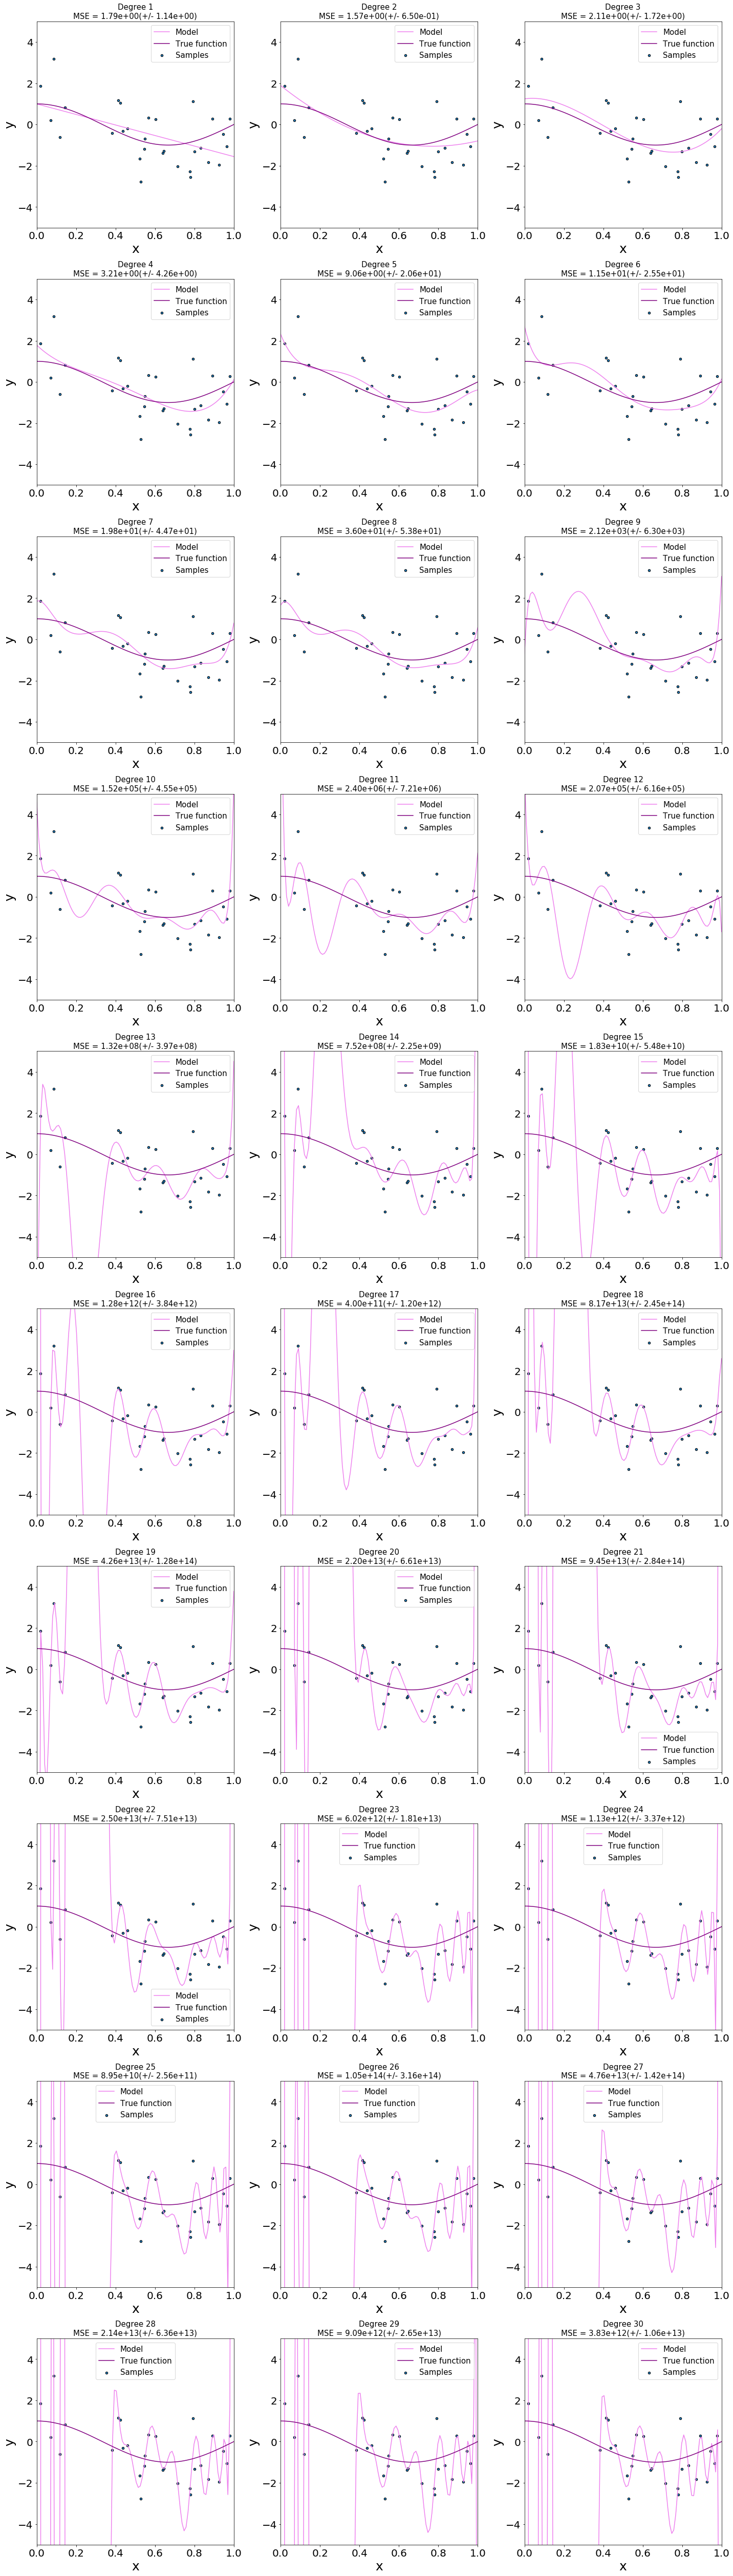

In [6]:
fig, axs = plt.subplots(nrows = 10, ncols = 3,  figsize = (20,70))
i = 0
X_test = np.linspace(0, 1, 100)
statistics2 = []

for row in axs:
    for ax in row:
        
        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        linear_regression = LinearRegression()
        
        pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)      
        
        ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color = 'violet', label="Model") 
        ax.plot(X_test, true_fun(X_test), color='purple', label="True function")
        ax.scatter(X, y, edgecolor= 'black', s=20, label="Samples")
        
        ax.set_ylabel(y_label)
        ax.yaxis.label.set_size( font_size )
        ax.set_ylim(ymin, ymax)       
        ax.set_xlabel(x_label)
        ax.xaxis.label.set_size( font_size )
        ax.set_xlim(xmin, xmax)       
        ax.tick_params(labelcolor = "black", labelsize = 20)      
        ax.legend(loc="best", fontsize = 15)
        
        statistics2.append( np.array([i+1, -scores.mean(), scores.std()]) )
        ax.set_title("Degree {:}\nMSE = {:.2e}(+/- {:.2e})".format(i+1,-scores.mean(),scores.std()),
                     fontsize = 15   )     
        i = i+1
        
fig.tight_layout()      


In [7]:
# PLOT PARAMETERS FOR true_func():

xmin = 0
xmax = 1
ymin = -5
ymax = 5

font_size = 25
color = "purple"
x_label = "x"
y_label = "y"


degrees = np.arange(1,31)
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples)) * (xmax - xmin) + xmin
y = true_fun(X) + np.random.randn(n_samples) * 0.5

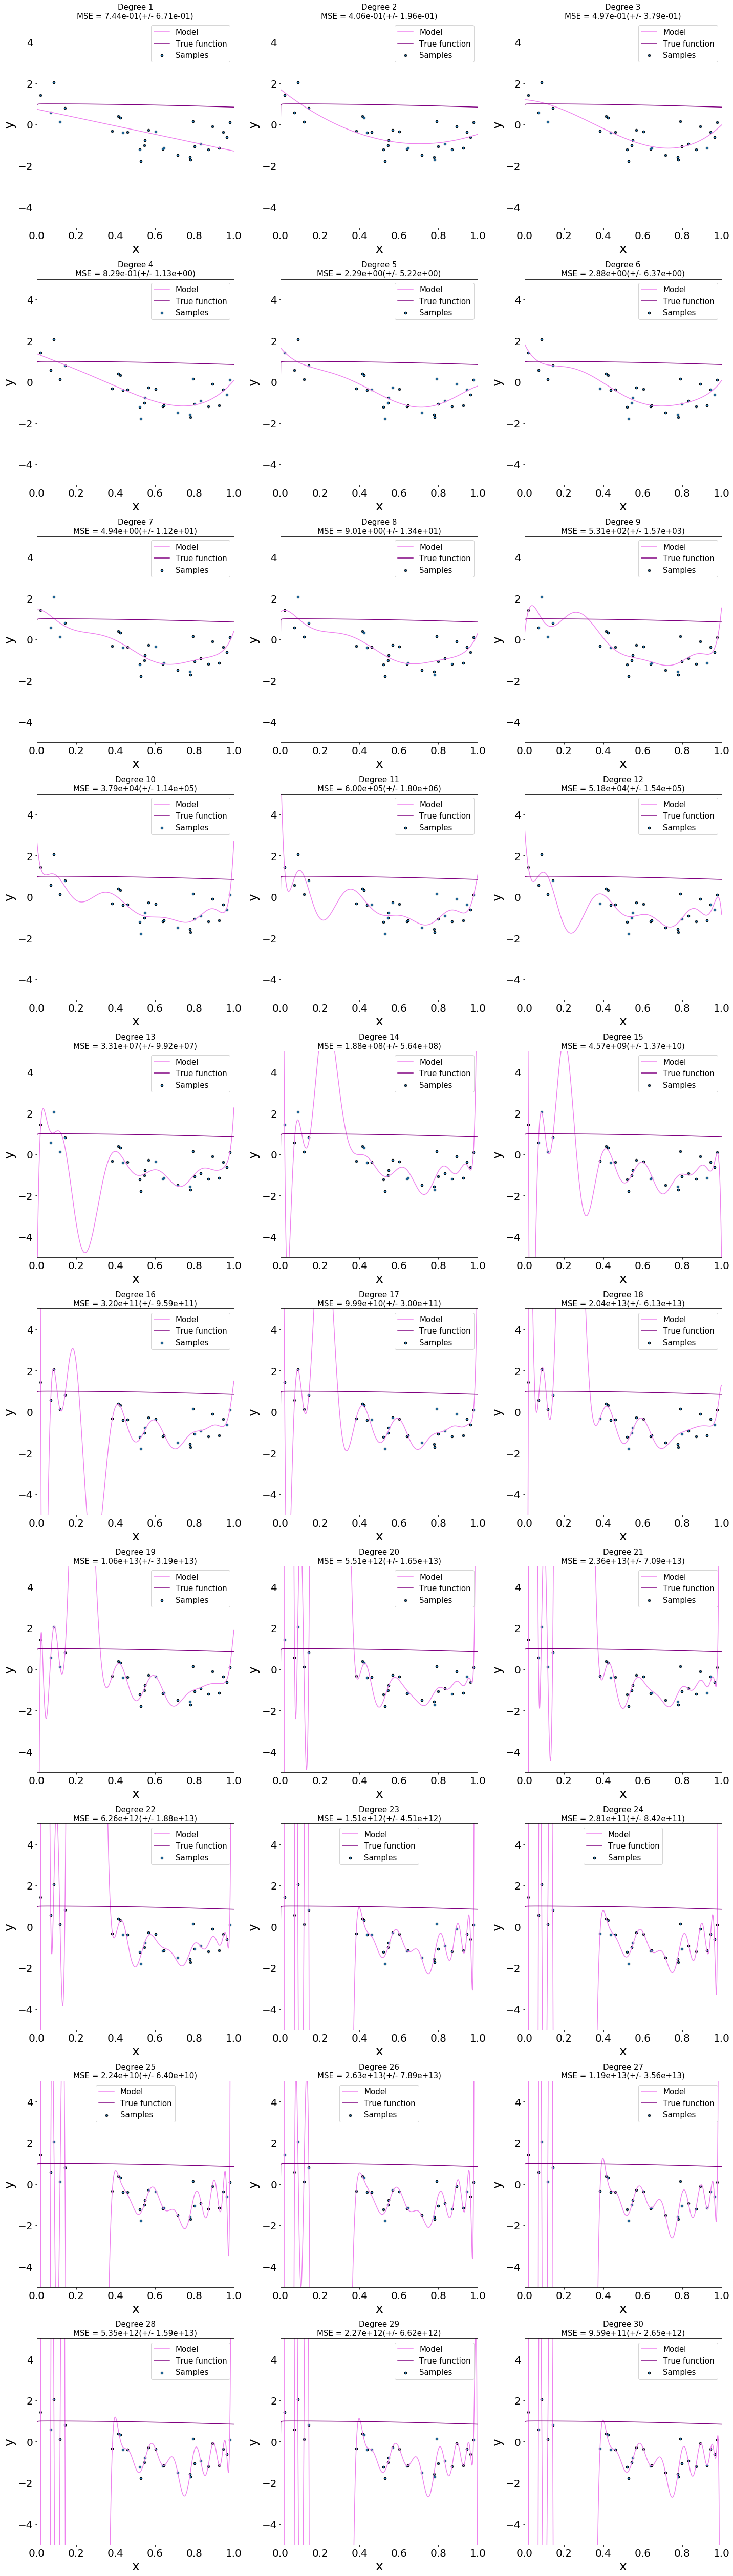

In [8]:
fig, axs = plt.subplots(nrows = 10, ncols = 3,  figsize = (20,70))
i = 0
X_test = np.linspace(xmin, xmax, 1000)
statistics1 = []

for row in axs:
    for ax in row:
        
        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        linear_regression = LinearRegression()
        
        pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)      
        
        ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color = 'violet', label="Model") 
        ax.plot(X_test, true_fun3(X_test), color='purple', label="True function")
        ax.scatter(X, y, edgecolor= 'black', s=20, label="Samples")
        
        ax.set_ylabel(y_label)
        ax.yaxis.label.set_size( font_size )
        ax.set_ylim(ymin, ymax)       
        ax.set_xlabel(x_label)
        ax.xaxis.label.set_size( font_size )
        ax.set_xlim(xmin, xmax)       
        ax.tick_params(labelcolor = "black", labelsize = 20)      
        ax.legend(loc="best", fontsize = 15)
        
        statistics1.append( np.array([i+1, -scores.mean(), scores.std()]) )
        
        ax.set_title("Degree {:}\nMSE = {:.2e}(+/- {:.2e})".format(i+1,-scores.mean(),scores.std()),
                     fontsize = 15   )     
        i = i+1
        
fig.tight_layout()      


In [9]:
# PARAMETERS:

xmin = -5
xmax = 5
ymin = -5
ymax = 5

font_size = 25
color = "purple"
x_label = "x"
y_label = "y"


degrees = np.arange(1,31)
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples)) * (xmax - xmin) + xmin
y = true_fun3(X) + np.random.randn(n_samples) * 0.2

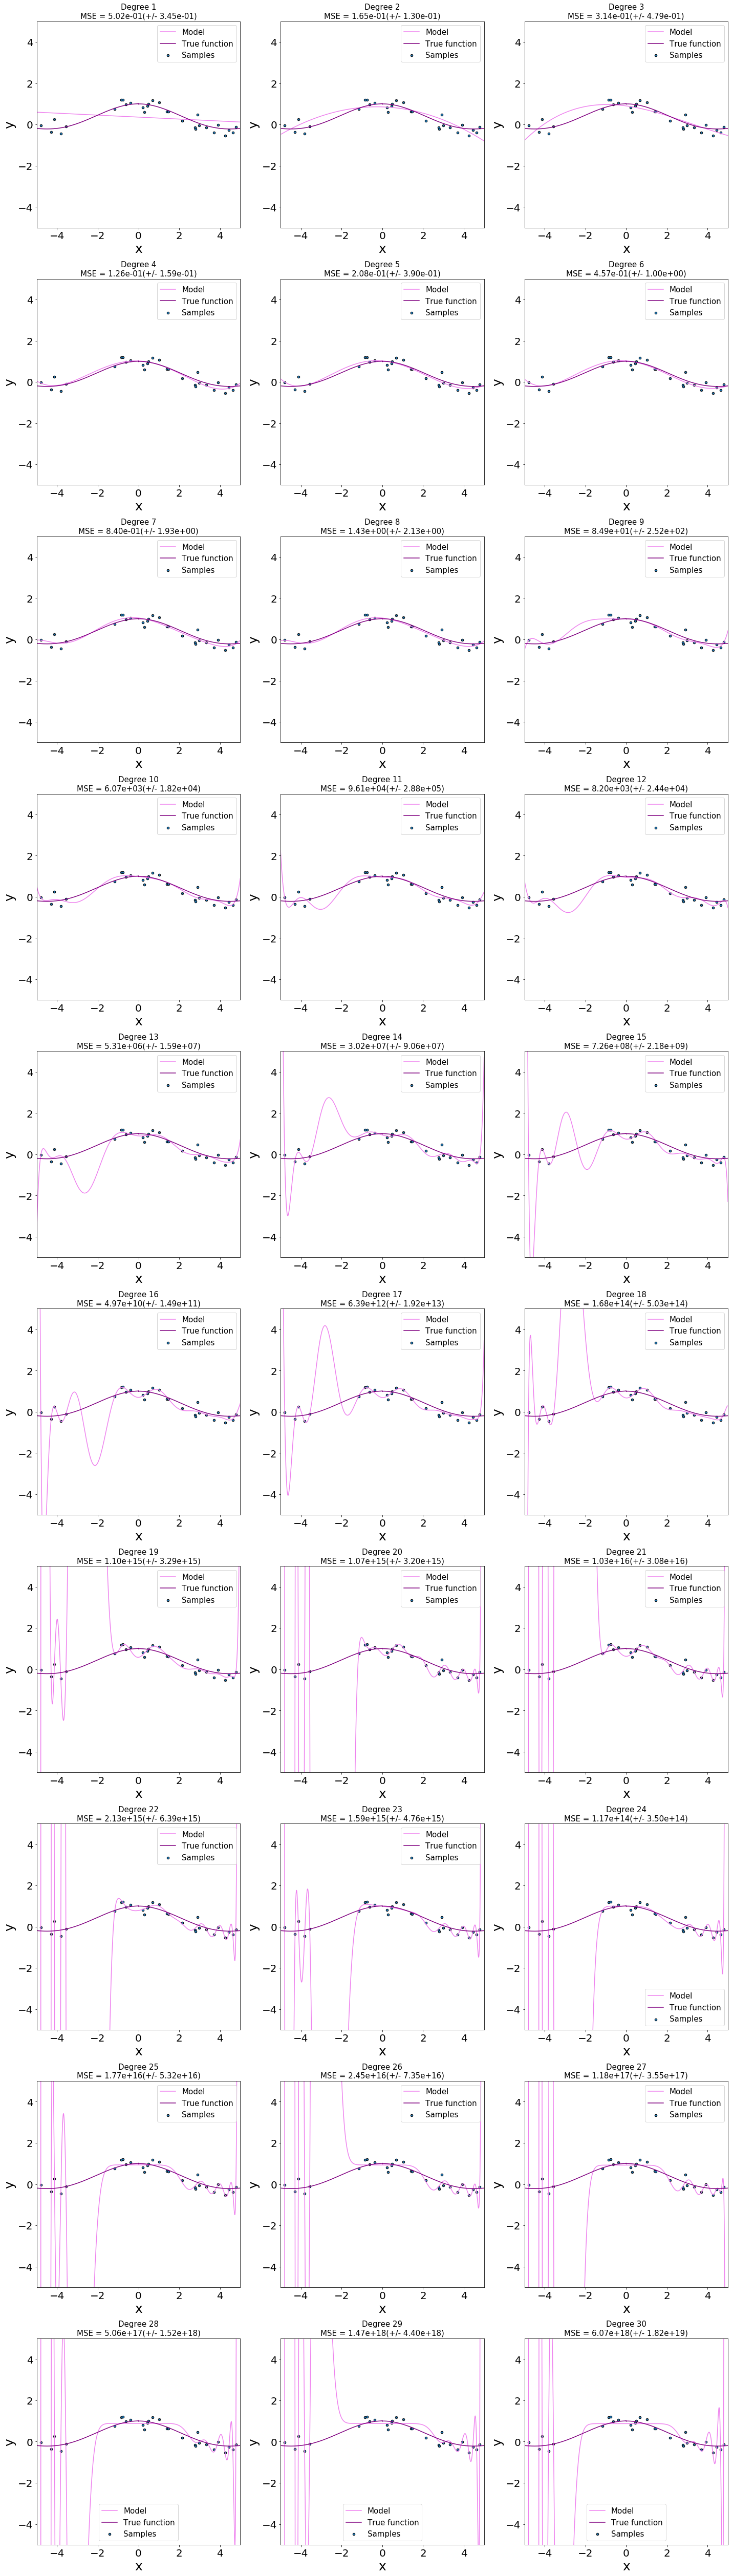

In [10]:
fig, axs = plt.subplots(nrows = 10, ncols = 3,  figsize = (20,70))
i = 0
X_test = np.linspace(xmin, xmax, 1000)
statistics3 = []

for row in axs:
    for ax in row:
        
        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        linear_regression = LinearRegression()
        
        pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)      
        
        ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color = 'violet', label="Model") 
        ax.plot(X_test, true_fun3(X_test), color='purple', label="True function")
        ax.scatter(X, y, edgecolor= 'black', s=20, label="Samples")
        
        ax.set_ylabel(y_label)
        ax.yaxis.label.set_size( font_size )
        ax.set_ylim(ymin, ymax)       
        ax.set_xlabel(x_label)
        ax.xaxis.label.set_size( font_size )
        ax.set_xlim(xmin, xmax)       
        ax.tick_params(labelcolor = "black", labelsize = 20)      
        ax.legend(loc="best", fontsize = 15)
        
        statistics3.append( np.array([i+1, -scores.mean(), scores.std()]) )
        
        ax.set_title("Degree {:}\nMSE = {:.2e}(+/- {:.2e})".format(i+1,-scores.mean(),scores.std()),
                     fontsize = 15   )     
        i = i+1
        
fig.tight_layout()      


## SUMMARY

The mean square error (MSE) changes with the polynomial degree in range n ={1, 30} as shown below. For small values of the polynomial degree (n = 1) our model is underfitted. For big values (n > 8) the model is ovefitted. When the the measurment noise is increased, MSE increase too.


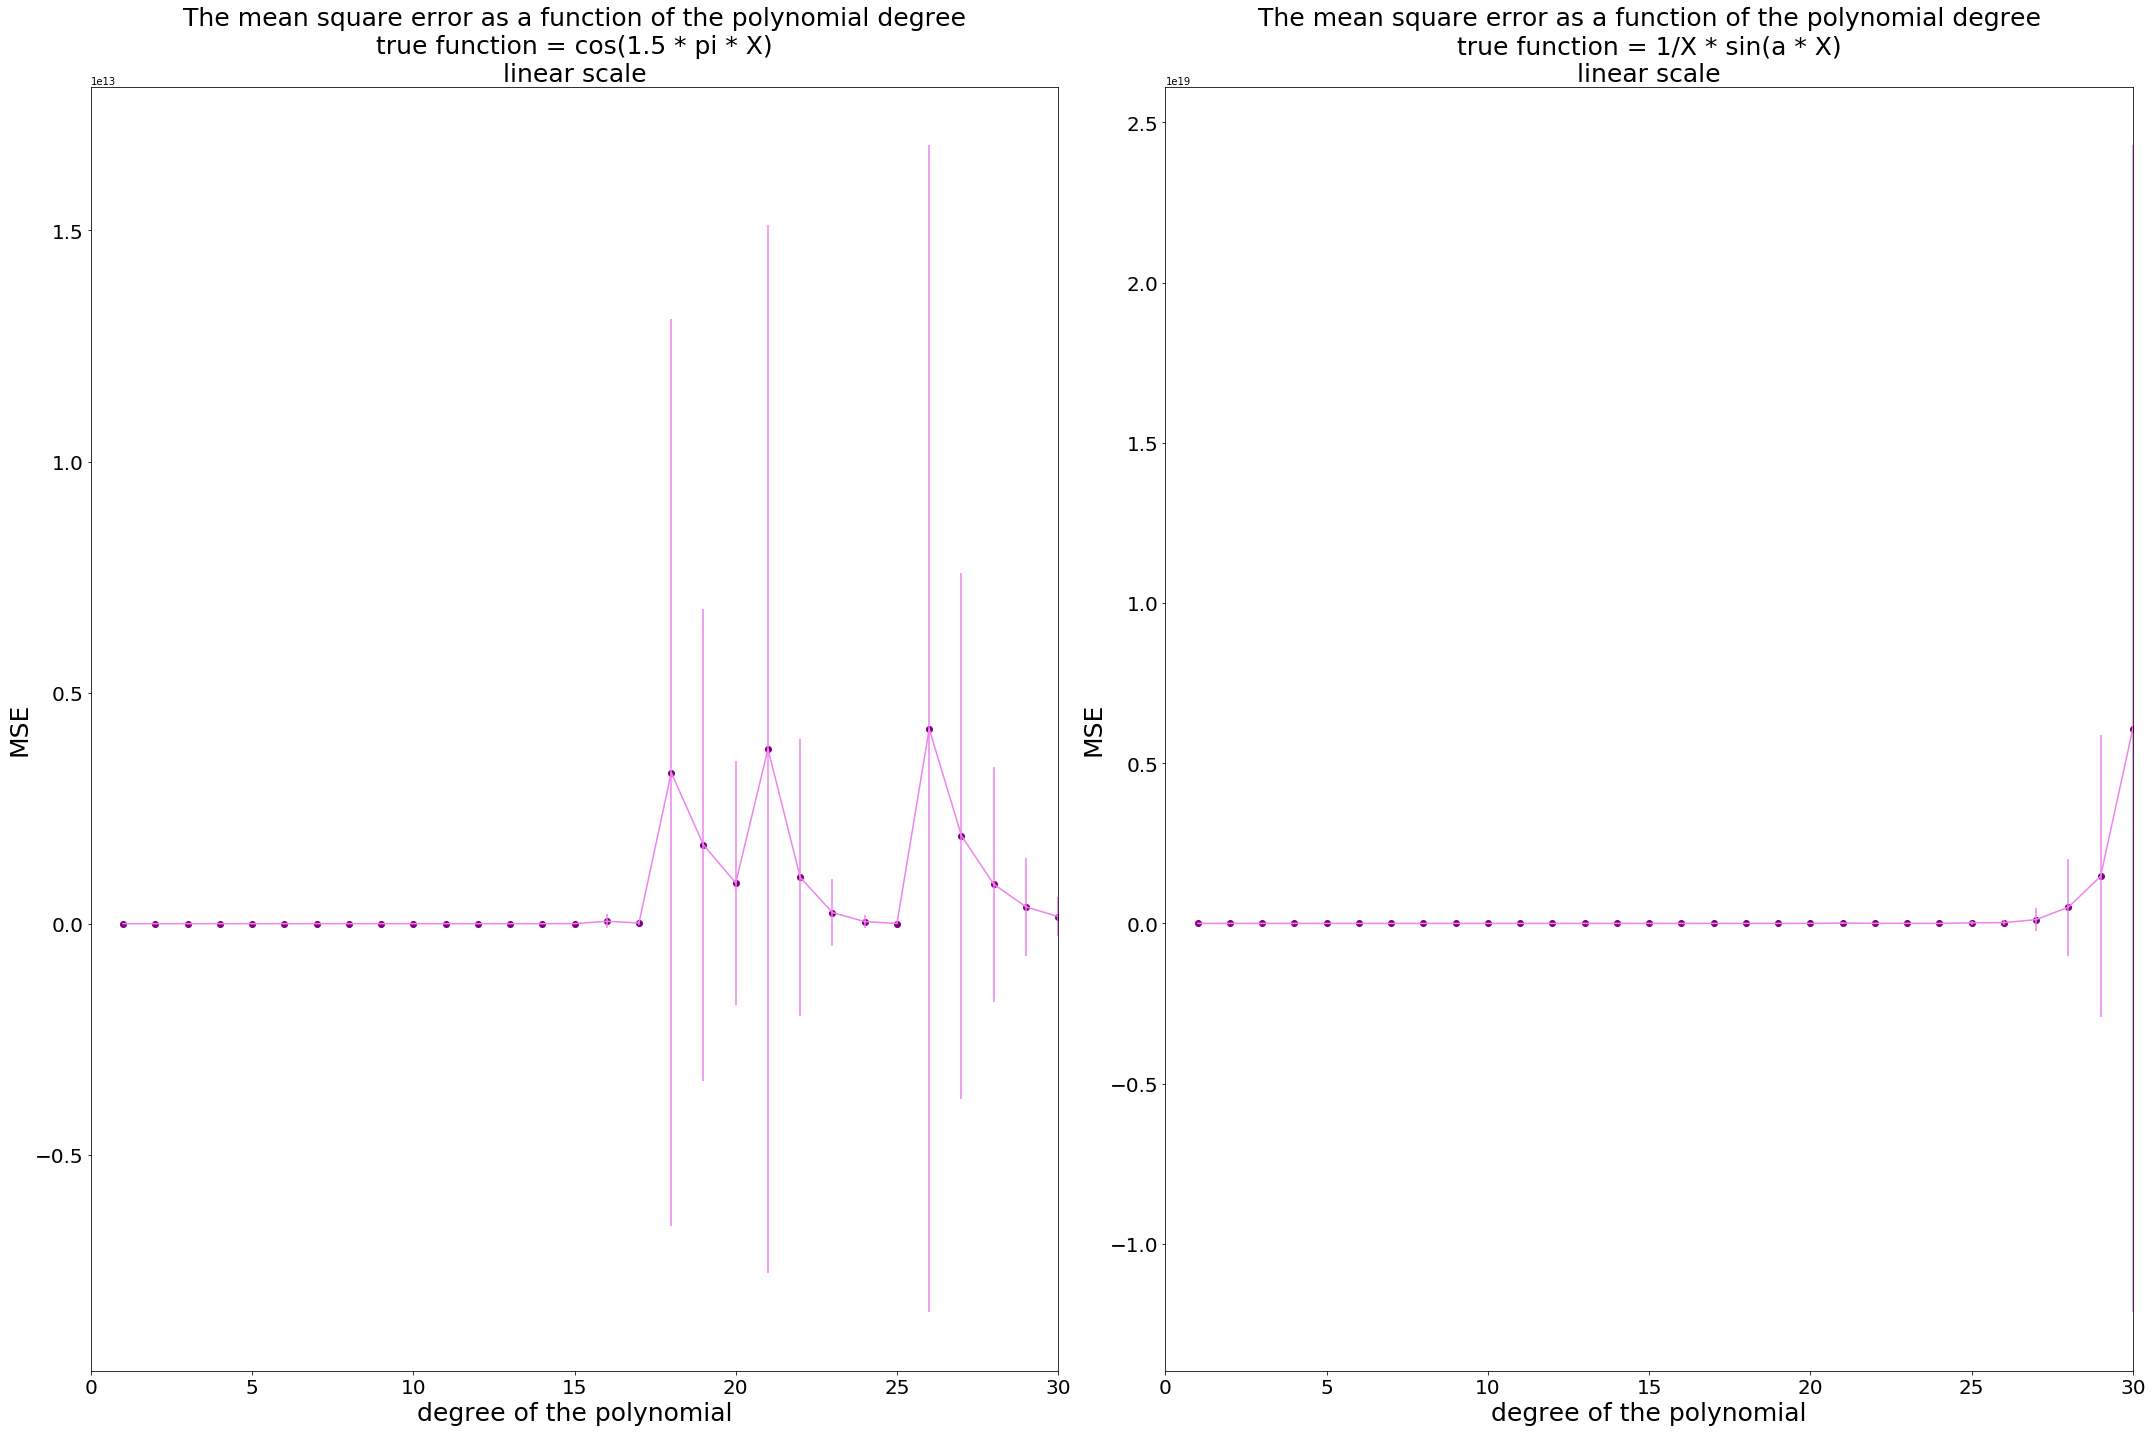

In [11]:
stat = np.transpose(statistics)
stat1 = np.transpose(statistics1)
stat2 = np.transpose(statistics2)
stat3 = np.transpose(statistics3)


fig, axs = plt.subplots(nrows = 1, ncols =2,  figsize = (30,20))

for ax in axs:  
    ax.set_ylabel("MSE")
    ax.set_xlabel("degree of the polynomial")
    ax.yaxis.label.set_size( font_size )
    ax.xaxis.label.set_size( font_size )
    
    ax.set_xlim(0, 30)       
    ax.set_xscale('linear')
    
    ax.tick_params(labelcolor = "black", labelsize = 20, grid_alpha = 0.5, grid_color = 'pink')      
    #ax.grid(True)
    
axs[0].errorbar(stat[0], stat[1], yerr= stat[2], color = "violet")
axs[1].errorbar(stat3[0], stat3[1], yerr= stat3[2], color = "violet")

axs[0].scatter(stat[0], stat[1], color = "purple")
axs[1].scatter(stat3[0], stat3[1], color = "purple")

axs[0].set_title("The mean square error as a function of the polynomial degree\ntrue function = cos(1.5 * pi * X)\nlinear scale",  fontsize = 25)  
axs[1].set_title("The mean square error as a function of the polynomial degree\ntrue function = 1/X * sin(a * X)\nlinear scale",   fontsize = 25)  
        
fig.tight_layout()    

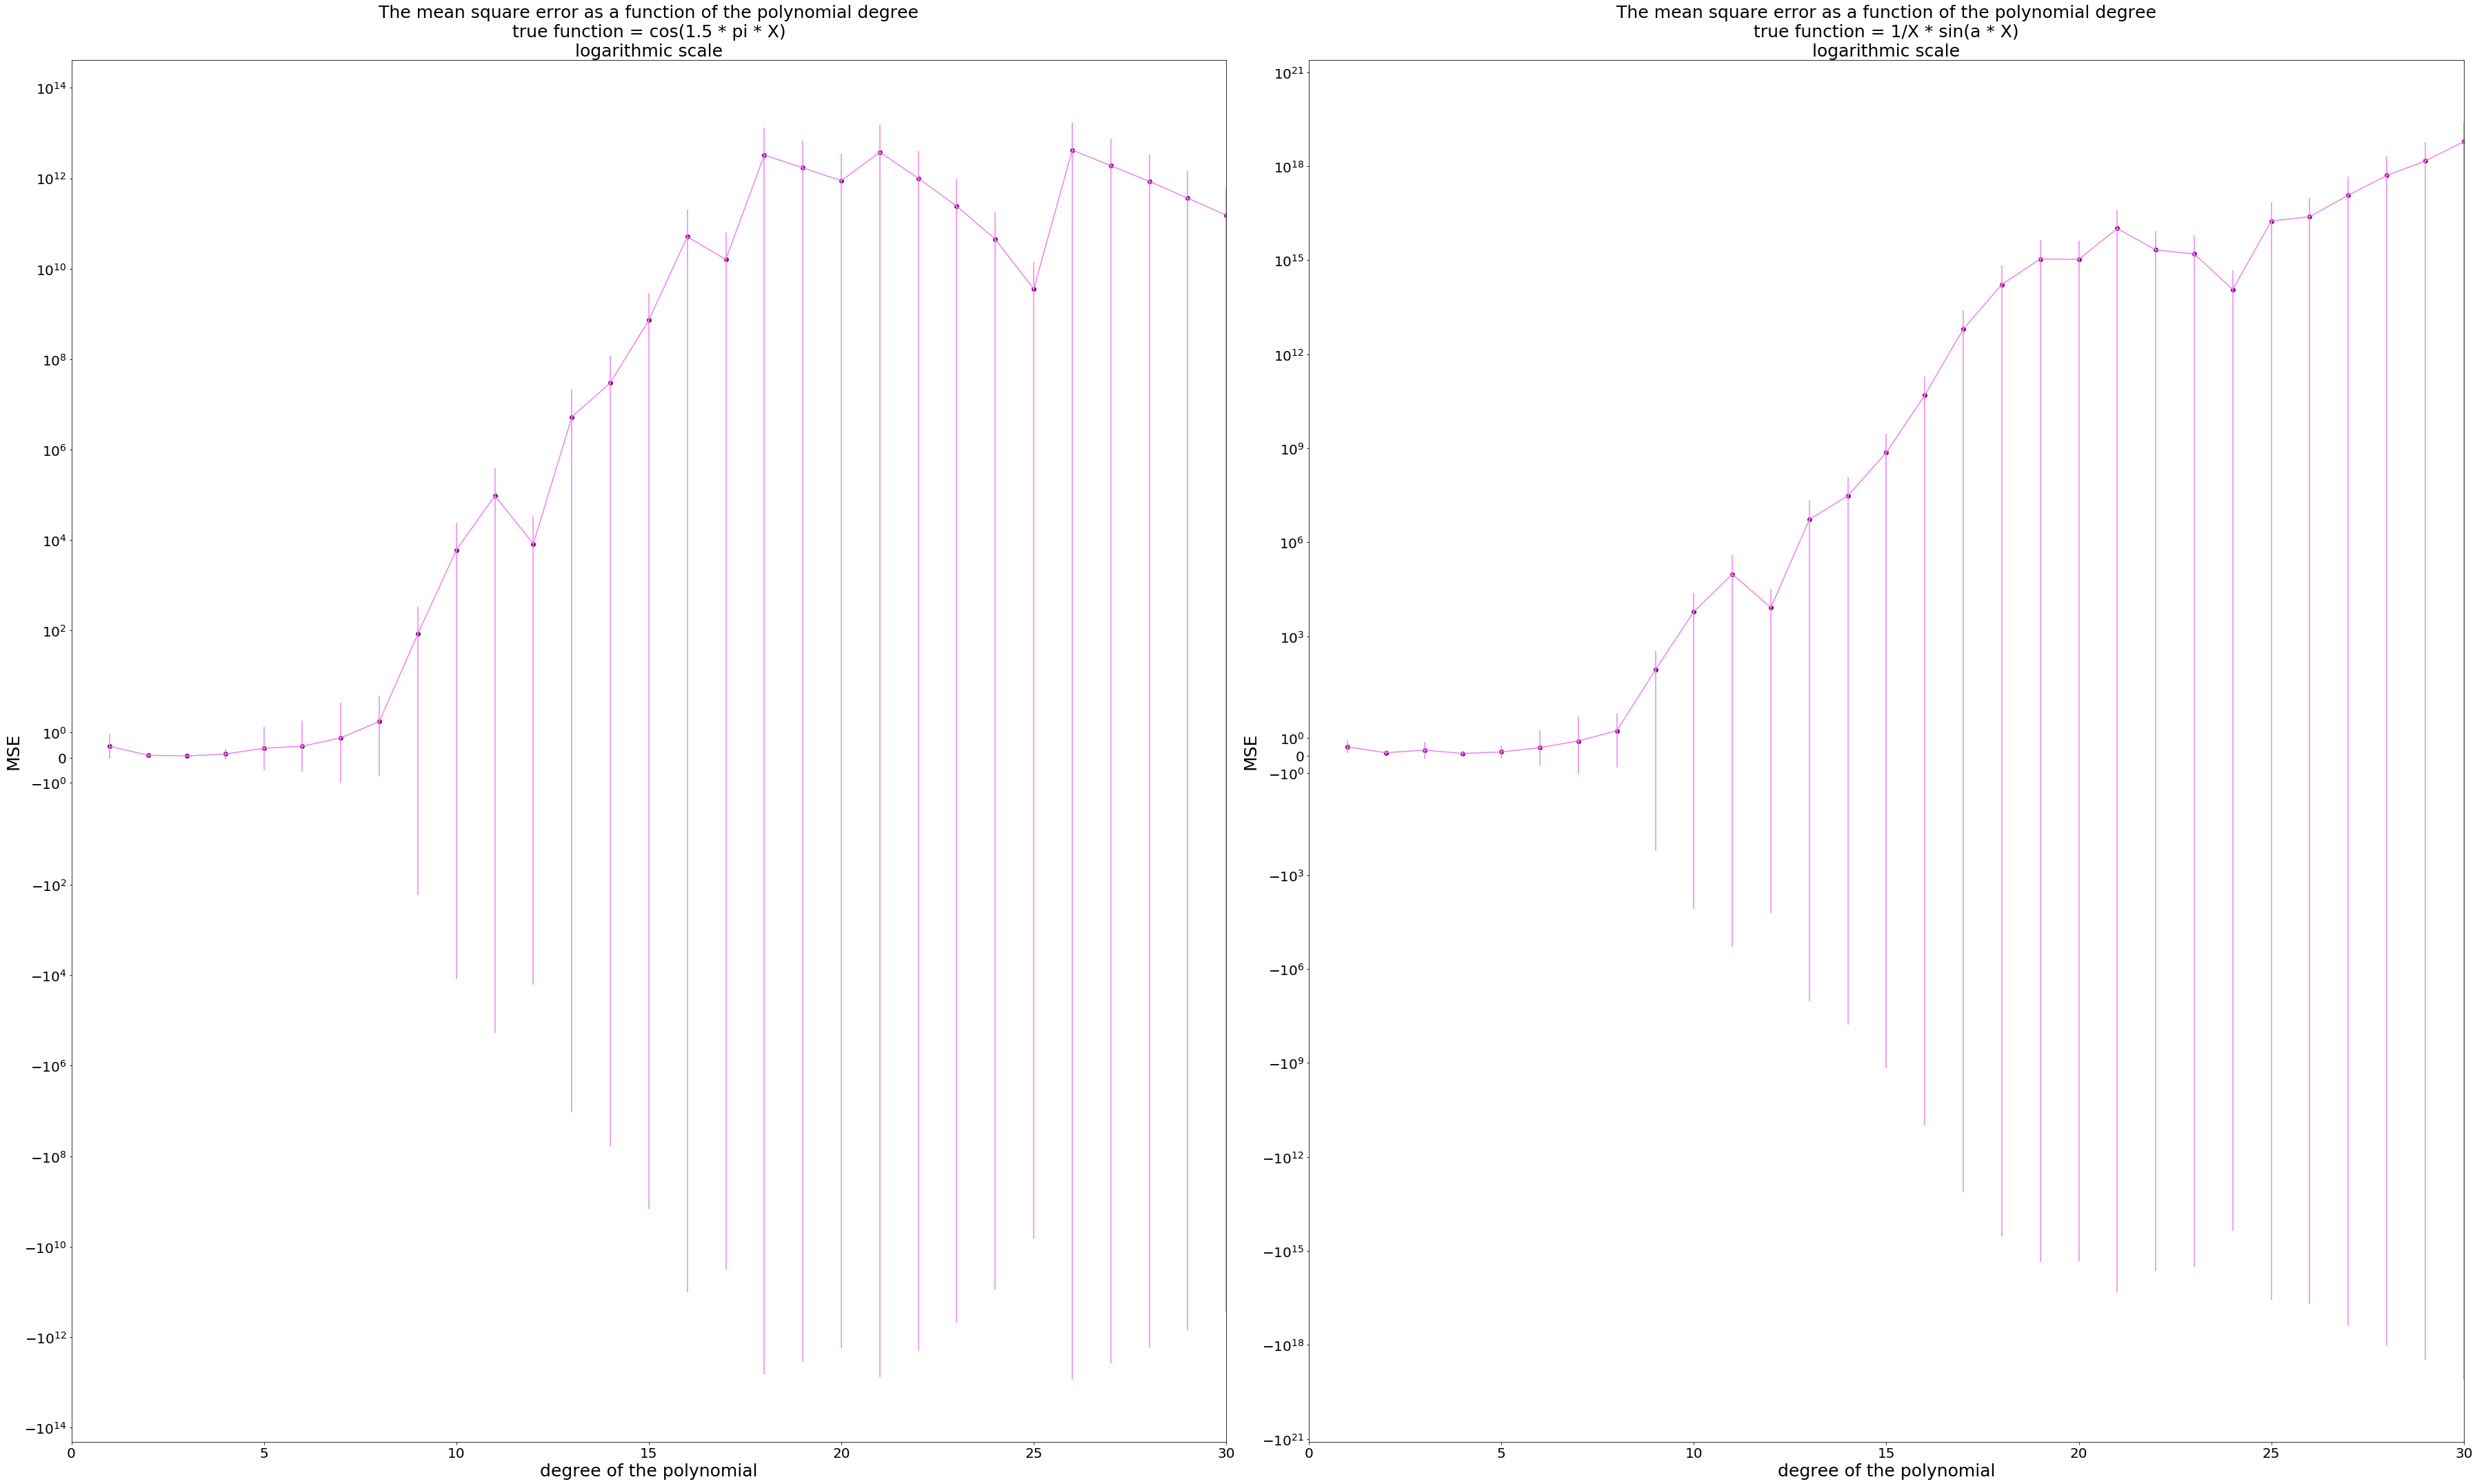

In [12]:
fig, axs = plt.subplots(nrows = 1, ncols = 2,  figsize = (50,30))

for ax in axs:  
    ax.set_ylabel("MSE")
    ax.set_xlabel("degree of the polynomial")
    ax.yaxis.label.set_size( font_size )
    ax.xaxis.label.set_size( font_size )
    
    ax.set_xlim(0, 30)       
    ax.set_yscale('symlog')
    ax.set_xscale('linear')
    
    ax.tick_params(labelcolor = "black", labelsize = 20, grid_alpha = 0.5, grid_color = 'pink')      
    #ax.grid(True)

axs[0].errorbar(stat[0], stat[1], yerr= stat[2], color = "violet")
axs[1].errorbar(stat3[0], stat3[1], yerr= stat3[2], color = "violet")

axs[0].scatter(stat[0], stat[1], color = "purple")
axs[1].scatter(stat3[0], stat3[1], color = "purple")

axs[0].set_title("The mean square error as a function of the polynomial degree\ntrue function = cos(1.5 * pi * X)\nlogarithmic scale",  fontsize = 25)  
axs[1].set_title("The mean square error as a function of the polynomial degree\ntrue function = 1/X * sin(a * X)\nlogarithmic scale",   fontsize = 25)  

        
fig.tight_layout()  

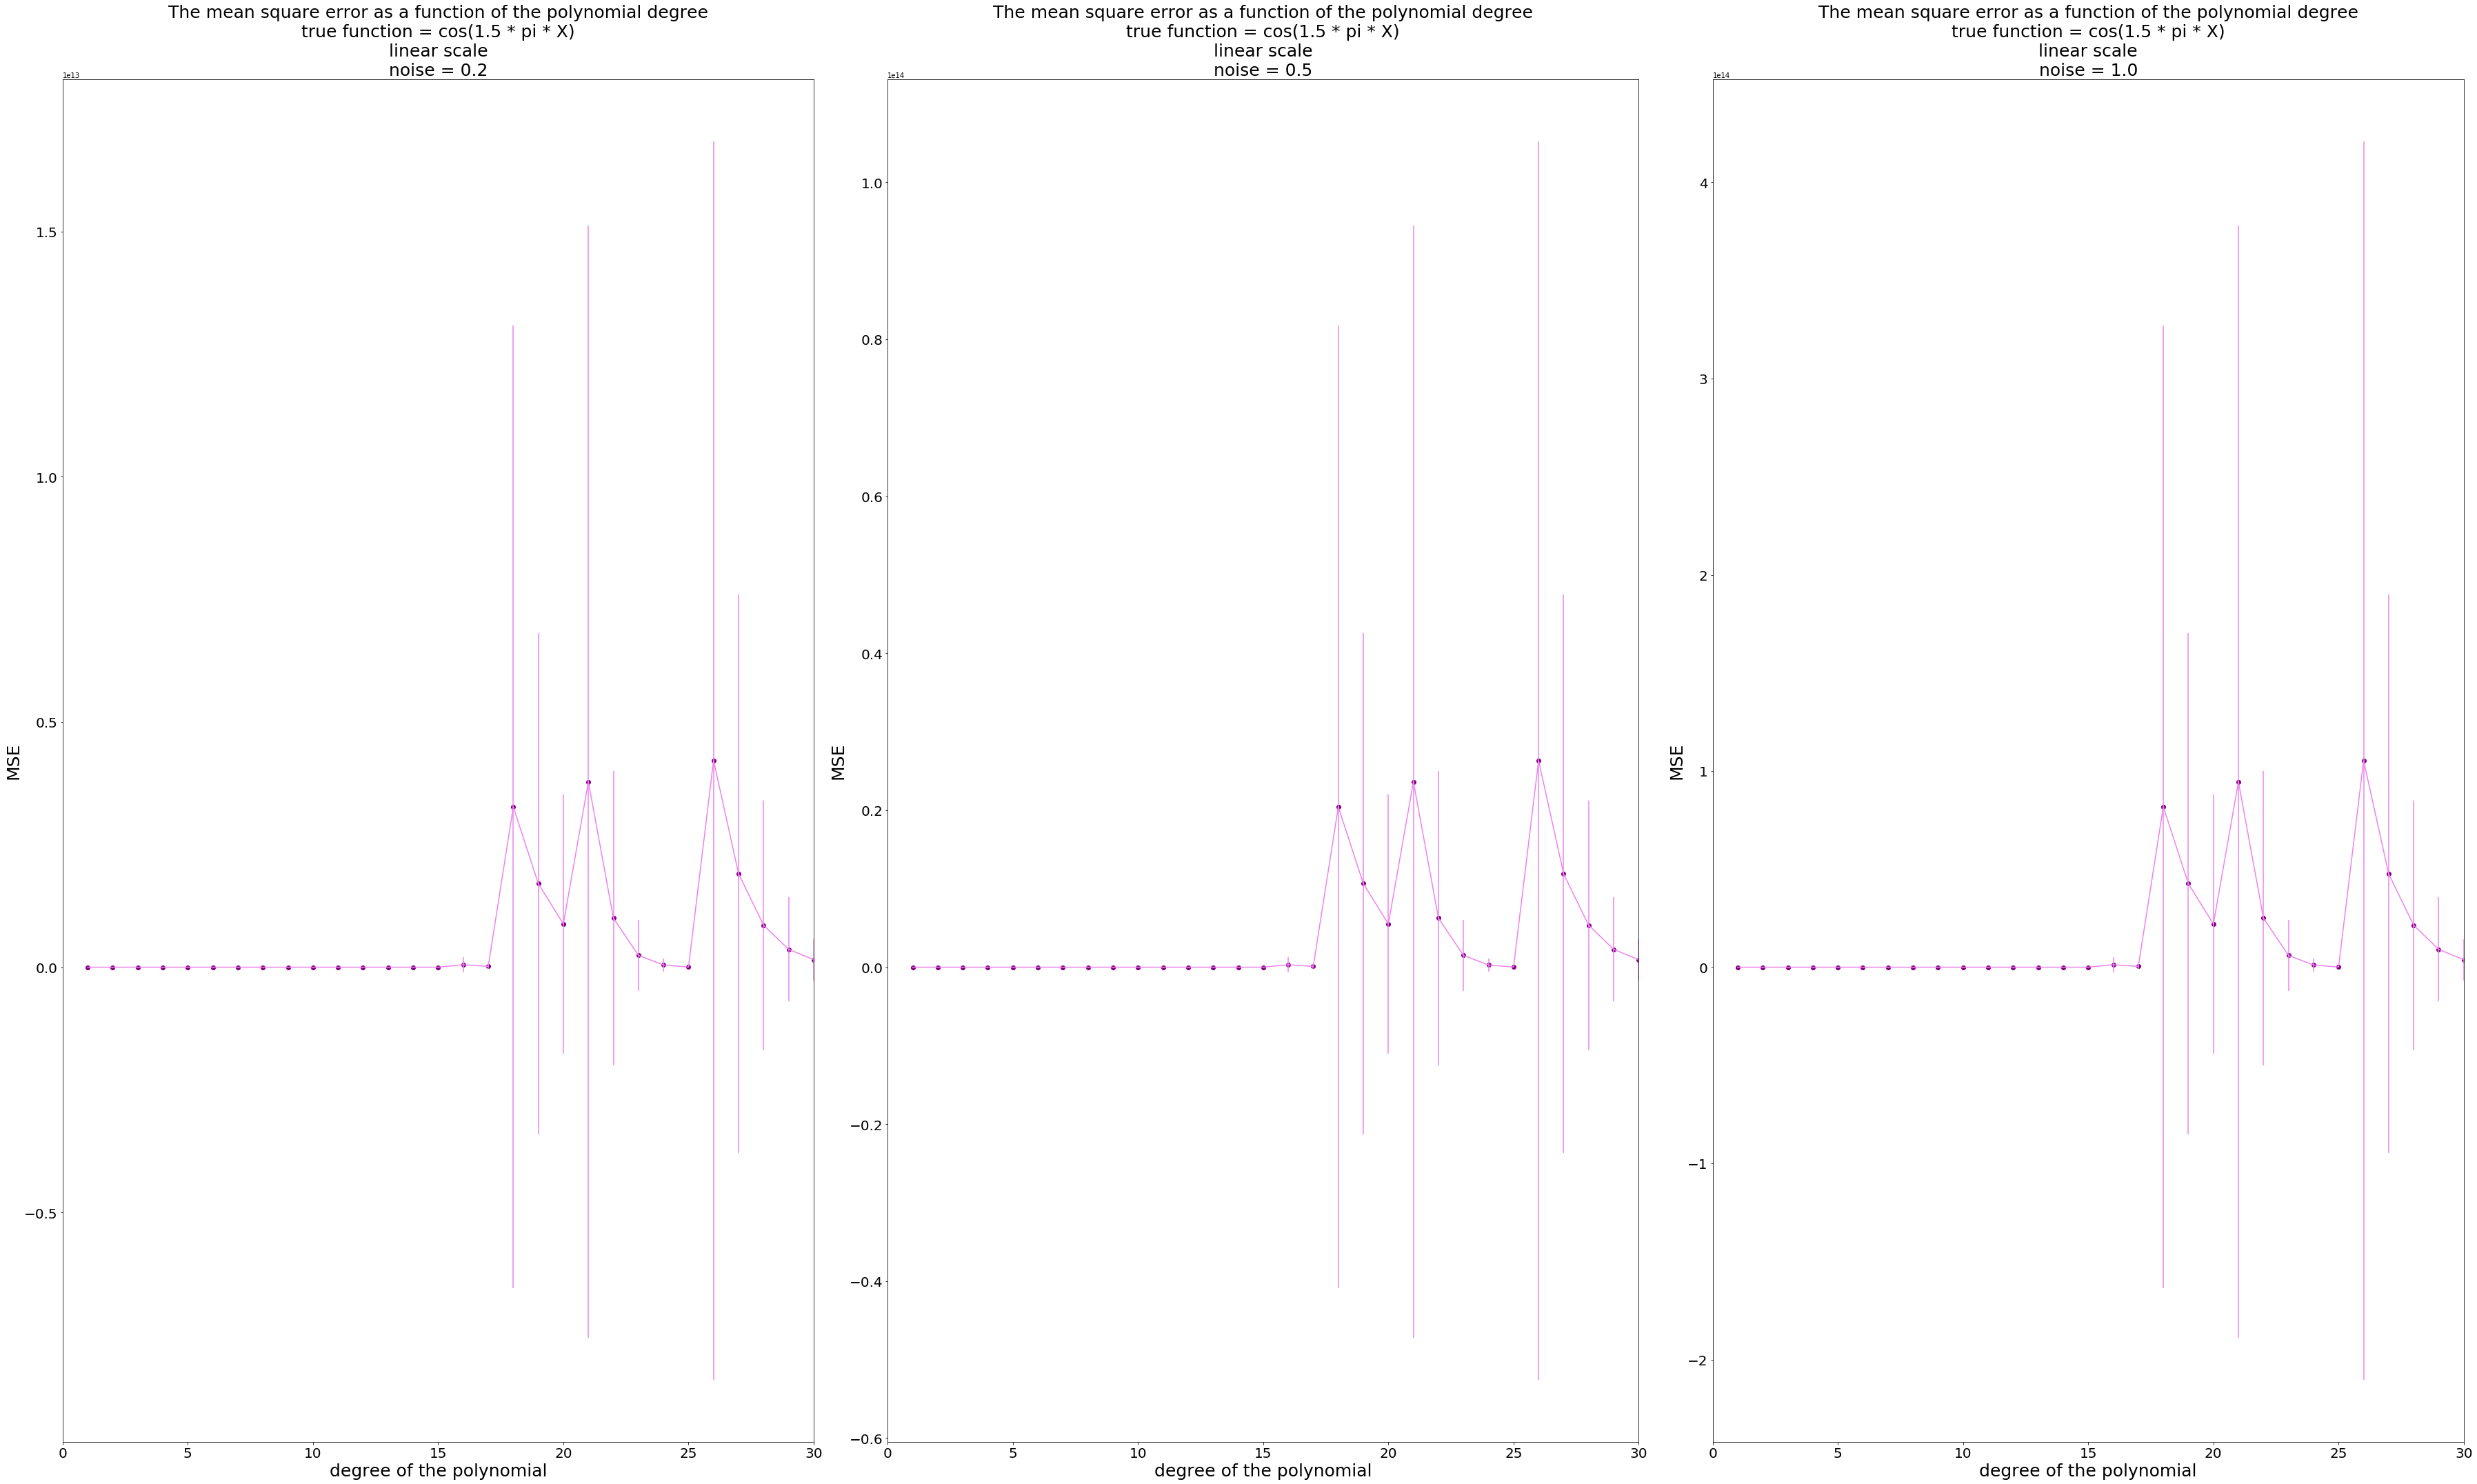

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 3,  figsize = (50,30))

for ax in axs:  
    ax.set_ylabel("MSE")
    ax.set_xlabel("degree of the polynomial")
    ax.yaxis.label.set_size( font_size )
    ax.xaxis.label.set_size( font_size )
    
    ax.set_xlim(0, 30)       
    #ax.set_yscale('symlog')
    ax.set_xscale('linear')
    
    ax.tick_params(labelcolor = "black", labelsize = 20, grid_alpha = 0.5, grid_color = 'pink')      
    #ax.grid(True)

axs[0].errorbar(stat[0], stat[1], yerr= stat[2], color = "violet")
axs[1].errorbar(stat1[0], stat1[1], yerr= stat1[2], color = "violet")
axs[2].errorbar(stat2[0], stat2[1], yerr= stat2[2], color = "violet")

axs[0].scatter(stat[0], stat[1], color = "purple")
axs[1].scatter(stat1[0], stat1[1], color = "purple")
axs[2].scatter(stat2[0], stat2[1], color = "purple")


axs[0].set_title("The mean square error as a function of the polynomial degree\ntrue function = cos(1.5 * pi * X)\nlinear scale\nnoise = 0.2",  fontsize = 25)  
axs[1].set_title("The mean square error as a function of the polynomial degree\ntrue function = cos(1.5 * pi * X)\nlinear scale\nnoise = 0.5",  fontsize = 25)  
axs[2].set_title("The mean square error as a function of the polynomial degree\ntrue function = cos(1.5 * pi * X)\nlinear scale\nnoise = 1.0",  fontsize = 25)  

        
fig.tight_layout()  